In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_city_data = 'data/city_data.csv'
path_ride_data = 'data/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(path_city_data)

In [4]:
ride_data_df = pd.read_csv(path_ride_data)

In [5]:
merged_df = pd.merge(city_data_df, ride_data_df, on='city')

In [6]:
grouped_city_type = merged_df.groupby(by=['type','city'])

In [7]:
merged_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

Average Fare ($) Per City Type

In [8]:
fares = grouped_city_type.mean()['fare']
Urban = fares['Urban']
Suburban = fares['Suburban']
Rural = fares['Rural']

Total Number of Rides Per City

In [9]:
grouped_by_city = merged_df.groupby(by=['type','city'])
Total_Num_Rides_Per_City = grouped_by_city.count()['ride_id']


Total_Num_Rides_Per_City_Urban = Total_Num_Rides_Per_City['Urban']
Total_Num_Rides_Per_City_Suburban = Total_Num_Rides_Per_City['Suburban']
Total_Num_Rides_Per_City_Rural = Total_Num_Rides_Per_City['Rural']

Total Number of Drivers Per City

In [10]:
Drivers_count_per_city = grouped_by_city.sum()['driver_count']


Drivers_count_per_city_Urban = Drivers_count_per_city['Urban']
Drivers_count_per_city_Suburban = Drivers_count_per_city['Suburban']
Drivers_count_per_city_Rural = Drivers_count_per_city['Rural']

Types of Cities

In [11]:
types = merged_df['type'].unique()

Plot

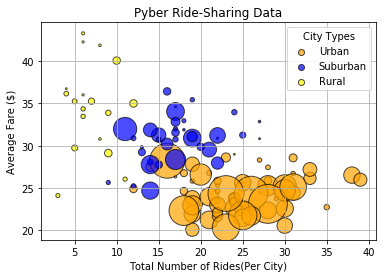

In [12]:
plt.scatter(Total_Num_Rides_Per_City_Urban, Urban, s=Drivers_count_per_city*.80, alpha=0.7, c='Orange', edgecolors="black")
plt.scatter(Total_Num_Rides_Per_City_Suburban, Suburban, s=Drivers_count_per_city*.80, alpha=0.7, c='Blue',edgecolors="black")
plt.scatter(Total_Num_Rides_Per_City_Rural, Rural, s=Drivers_count_per_city*.80, alpha=0.7, c='Yellow', edgecolors="black")

plt.grid()
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride-Sharing Data')
plt.legend(types, loc=0, frameon=True, title='City Types', markerscale=0.2)

Pie Charts

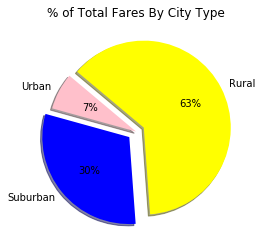

In [13]:
fares_sum = merged_df.groupby('type').sum()
labelsfare = merged_df['type'].unique()


plotfare = fares_sum['fare']
explode = (0, 0.1, 0.1)
colors = ['Pink', 'Blue', 'Yellow']
plt.pie(plotfare, labels=labelsfare, explode=explode, shadow=True, colors=colors, autopct='%1.0f%%', startangle=140)
plt.title('% of Total Fares By City Type')
plt.savefig('%ofTotalFaresByCityType')

In [14]:

merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


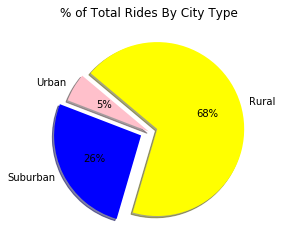

In [18]:
rides_sum_pie = merged_df.groupby('type').count()
plot2 = rides_sum_pie['city']


labelsfare = merged_df['type'].unique()
explode = (0, 0.1, 0.1)
colors = ['Pink', 'Blue', 'Yellow']
plt.pie(plot2, explode=explode, shadow=True, colors=colors, labels=labelsfare, autopct='%1.0f%%', startangle=140)
plt.title('% of Total Rides By City Type')
plt.savefig('%ofTotalRidesByCityType')

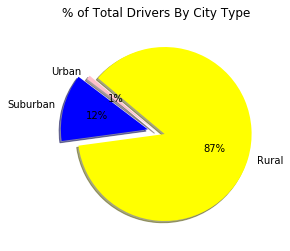

In [25]:
drivers_sum = merged_df.groupby('type').sum()
plot3 = drivers_sum['driver_count']


labelsfare = merged_df['type'].unique()
explode = (0, 0.1, 0.1)
colors = ['Pink', 'Blue', 'Yellow']
plt.pie(plot3, explode=explode, shadow=True, colors=colors, labels=labelsfare, autopct='%1.0f%%', startangle=140)
plt.title('% of Total Drivers By City Type')
plt.savefig('%ofTotalDriversByCityType')